# Import Library

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Import Library for Sentiment Analysis
import pandas as pd
#Import Library for numerical operator
import numpy as np

#Import Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Import os
import os

#Import NLTK (Natural Language Toolkit)
import nltk

#Import Library to text processing
from nltk.corpus import stopwords

#WordNetLemmatizer is used to group words with the same meaning by reducing them to their base form (lemma)
from nltk.stem import WordNetLemmatizer

# Converts text data into numerical data
from sklearn.feature_extraction.text import CountVectorizer

# Splits the dataset into training and testing subsets for model evaluation.
from sklearn.model_selection import train_test_split

# Naive Bayes algorithm is a probabilistic classifier often used for text classification tasks.
from sklearn.naive_bayes import MultinomialNB

# Used to measure the performance of the model
from sklearn.metrics import accuracy_score, classification_report

# text preprocessing, such as cleaning and searching text patterns.
import re

#Used to handle string operations, like removing punctuation from text.
import string


#Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Import Datasets

In [11]:
col = ['ID','Platform','Label','Tweet']
df = pd.read_csv('/content/drive/MyDrive/Self Project Datasets/Data Twitter/twitter_training.csv',names=col)

In [12]:
df.head()

,ID,Platform,Label,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.head(10)

,ID,Platform,Label,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        74682 non-null  int64 
 1   Platform  74682 non-null  object
 2   Label     74682 non-null  object
 3   Tweet     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Remove Null Value

In [15]:
#check null Value in Tweet
df = df.dropna(subset=['Tweet'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        73996 non-null  int64 
 1   Platform  73996 non-null  object
 2   Label     73996 non-null  object
 3   Tweet     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


# Datasets Assessments

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        73996 non-null  int64 
 1   Platform  73996 non-null  object
 2   Label     73996 non-null  object
 3   Tweet     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [18]:
df['Label'].value_counts()

,count
Label,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [19]:
df['Platform'].value_counts()

,count
Platform,
LeagueOfLegends,2377
MaddenNFL,2377
CallOfDuty,2376
Verizon,2365
TomClancysRainbowSix,2364
Facebook,2362
Microsoft,2361
Dota2,2359
WorldOfCraft,2357


# Model Preparation

## Text Cleaning

In [20]:
# Text Cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove number
    text = re.sub(r'\d+', '', text)
    # Remove strip, space, " and ' from tweet
    text = text.strip(' "\'')
    # remove retweet
    text = re.sub(r'^RT[\s]+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [21]:
df['clean_text'] = df['Tweet'].apply(lambda x: clean_text(x))

In [22]:
# Remove emoji
def clean_emoji(text):

  # Menghapus emoticon
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)

  # Menghapus non ASCII character
  encoded_string = text.encode("ascii", "ignore")
  text = encoded_string.decode()

  return(text)

In [23]:
df['clean_text'] = df['clean_text'].apply(lambda x: clean_emoji(x))

## Tokenizing

In [24]:
#Tokenizing
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [25]:
#Apply Tekenizing
df['tokens'] = df['clean_text'].apply(lambda x: tokenize_text(x))

In [26]:
df.head()

,ID,Platform,Label,Tweet,clean_text,tokens
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."


### Remove Stopwords

#### Tokenizing

In [27]:
# Tokenizing
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [28]:
df['tokenize'] = df['clean_text'].apply(lambda x: tokenize_text(x))

#### Remove Stopwords

In [29]:
# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [30]:
df['no_stopwords'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

#### Stemming

In [31]:
# Stemming
def stemming_text(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [32]:
df['stemming'] = df['no_stopwords'].apply(lambda x: stemming_text(x))

#### Lemmitaztion

In [33]:
# Lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [34]:
df['lemmatization'] = df['stemming'].apply(lambda x: lemmatize_text(x))

In [35]:
# Merge the word from lemmatization
def merge_text(tokens):
    merged_text = ' '.join(tokens)
    return merged_text

In [36]:
df['merged_text'] = df['lemmatization'].apply(lambda x: merge_text(x))

# Sentiment Labeling

In [37]:
# Sentiment labeling using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def get_sentiment_vader_y(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
df['sentiment_y'] = df['merged_text'].apply(lambda x: get_sentiment_vader_y(x)) # Changed get_sentiment_y to get_sentiment_vader_y and passing x(the text) as argument

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             73996 non-null  int64 
 1   Platform       73996 non-null  object
 2   Label          73996 non-null  object
 3   Tweet          73996 non-null  object
 4   clean_text     73996 non-null  object
 5   tokens         73996 non-null  object
 6   tokenize       73996 non-null  object
 7   no_stopwords   73996 non-null  object
 8   stemming       73996 non-null  object
 9   lemmatization  73996 non-null  object
 10  merged_text    73996 non-null  object
 11  sentiment_y    73996 non-null  object
dtypes: int64(1), object(11)
memory usage: 7.3+ MB


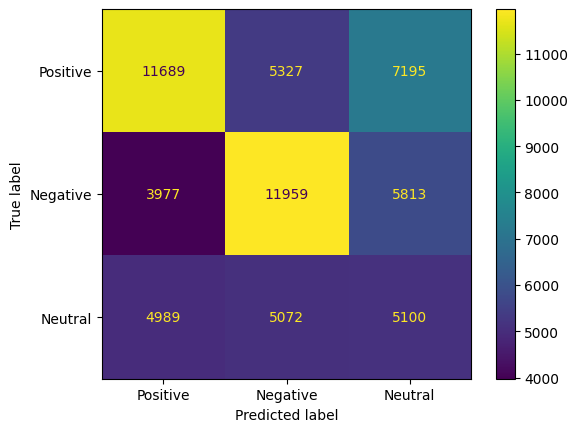

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(df['sentiment_y'], df['Label'], labels=['Positive', 'Negative', 'Neutral'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative', 'Neutral'])
disp.plot()
plt.show()


In [43]:
from sklearn.metrics import f1_score

f1 = f1_score(df['Label'], df['sentiment_y'], average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.3473870304977144


After reviewing the confusion matrix and F1 score, the results are significantly different from what was expected. I'm looking for a new algorithm to try.